In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
from celluloid import Camera
import pandas as pd
from ast import literal_eval
%matplotlib inline

In [2]:
waiting_data = pd.read_csv("datasets/waiting-before-thresh.csv", dtype='category')
whole_data = pd.read_csv("datasets/intersections-dataset-transformed.csv", dtype='category')

In [3]:
slowing_data = pd.read_csv("datasets/slowing-before-thresh.csv", dtype='category')
speeding_data = pd.read_csv("datasets/speeding-before-thresh.csv", dtype='category')

In [4]:
before_thresh = pd.read_csv("datasets/intersections-dataset-before-thresh.csv", dtype='category')

Wait:
 [-2.8369600000000004, -2.809655, -2.806765, -2.809866, -2.8080689999999997, -2.811288, -2.8189180000000005, -2.8213580000000005, -2.835141, -2.8369470000000003, -2.8417360000000005, -2.8487299999999998, -2.8513479999999998, -3.0176130000000003, -3.0170939999999997, -2.8264970000000003, -2.824006, -2.8210900000000003, -2.8220169999999998, -2.842477, -2.8427960000000003, -2.8408349999999998, -2.844279, -2.84207, -2.844993, -2.8120740000000004, -2.8205020000000003, -2.821315, -2.8223130000000003, -2.828266, -2.831055, -2.835456, -2.833409, -2.8298509999999997, -2.8437639999999997, -2.8518190000000003, -2.8539890000000003, -2.8597180000000004, -2.8693950000000004, -2.869755, -2.8764770000000004, -2.882963, -2.8923110000000003, -2.8932690000000005, -2.9019540000000004, -2.9129150000000004, -2.9185930000000004, -2.9242250000000003, -2.9292140000000004, -2.939373] 
 [-4.831599999999998, -4.933699999999998, -4.9346, -4.935399999999998, -4.9314, -4.932199999999998, -4.847899999999999, -4

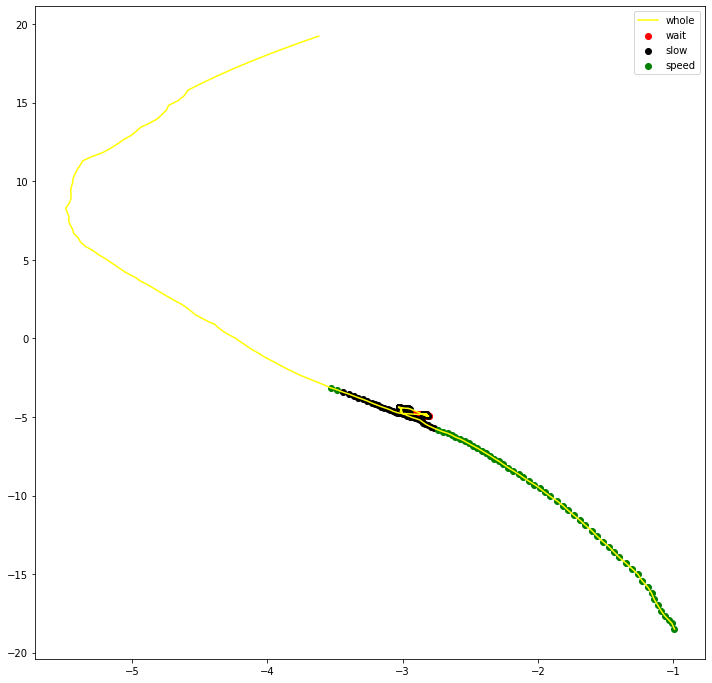

In [10]:
# i = '3527' # Waiting, speeding

# From overlapping speeding and slowing 10 random tracks
# i = '333' # Speeding, slowing
# i = '1463' # Speed, slow, speed, slow
# i = '69240' # Speed, slow, speed
# i = '137345' # Slow, speed, slow
# i = '115582' # Speed, slow
# i = '104050' # Speed, slow
# i = '69471' # Slow, speed
# i = '53607' # Speed, slow
# i = '40008' # Speed, slow, speed
# i = '112132' # Speed, slow
i = '70659'



# for i in ids:
subWait = waiting_data.loc[waiting_data['uniqueId'] == i]
waitX = subWait['relative_x_trans'].astype(float).to_list()
waitY = subWait['relative_y_trans'].astype(float).to_list()

subSlow = slowing_data.loc[slowing_data['uniqueId'] == i]
slowX = subSlow['relative_x_trans'].astype(float).to_list()
slowY = subSlow['relative_y_trans'].astype(float).to_list()

subSpeed = speeding_data.loc[speeding_data['uniqueId'] == i]
speedX = subSpeed['relative_x_trans'].astype(float).to_list()
speedY = subSpeed['relative_y_trans'].astype(float).to_list()

subW = whole_data.loc[whole_data['uniqueId'] == i]
wX = subW['relative_x_trans'].astype(float).to_list()
wY = subW['relative_y_trans'].astype(float).to_list()

subThresh = before_thresh.loc[before_thresh['uniqueId'] == i]
threshX = subThresh['relative_x_trans'].astype(float).to_list()
threshY = subThresh['relative_y_trans'].astype(float).to_list()

# print("Wait:\n", waitX, "\n", waitY)
# print("Slow:\n", slowX, "\n", slowY)
# print("Speed:\n", speedX, "\n", speedY)

# plt.plot(wX, wY)
# plt.scatter(x, y)
# plt.show()

fig, ax = plt.subplots(figsize=(12, 12))

# ax.plot(threshX, threshY, color='yellow', label='whole')
ax.plot(wX, wY, color='yellow', label='whole')
ax.scatter(waitX, waitY, color='red', label='wait')
ax.scatter(slowX, slowY, color='black', label='slow')
ax.scatter(speedX, speedY, color='green', label='speed')

plt.legend()
plt.show()

In [55]:
slow_ids = slowing_data['uniqueId'].drop_duplicates().values.tolist()
speed_ids = speeding_data['uniqueId'].drop_duplicates().values.tolist()
wait_ids = waiting_data['uniqueId'].drop_duplicates().values.tolist()

comm_ids = []
for i in wait_ids:
    if i in speed_ids:
        comm_ids.append(i)
print(comm_ids)
print("Len comm ids", len(comm_ids))
print("Len slow ids: ", len(slow_ids))
print("Len speed ids: ", len(speed_ids))
print("Len wait ids: ", len(wait_ids))

['1840', '3502', '3527', '3532', '3978', '4004', '5261', '5436', '5484', '5994', '7161', '7163', '7643', '8258', '9019', '9604', '9982', '11093', '11326', '13743', '14730', '15858', '19004', '19006', '19919', '21048', '21570', '22804', '23537', '24630', '24782', '25367', '26242', '31148', '32191', '32358', '32383', '32410', '32630', '33817', '33843', '33916', '34722', '34939', '36030', '36279', '69651', '143492', '21331', '25803', '36581', '37079', '37169', '37250', '37457', '37489', '37649', '37916', '38082', '38205', '38619', '39588', '40001', '40458', '40509', '40552', '40558', '40708', '41283', '41727', '42285', '42466', '44825', '47242', '47270', '48053', '48829', '49030', '49636', '49949', '50059', '50344', '50623', '51196', '51738', '51981', '52063', '52142', '52383', '52445', '52549', '53114', '53175', '54432', '54962', '55233', '55979', '58182', '58658', '59380', '59516', '62150', '63308', '66436', '66451', '67717', '68334', '68978', '69240', '69338', '69460', '69574', '69654'

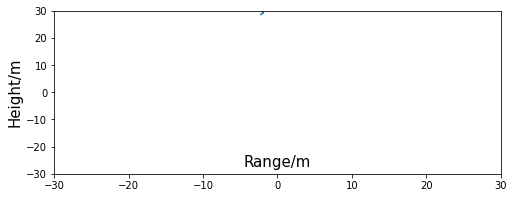

In [5]:
# Set up the graph using Matplotlib
fig, ax = plt.subplots(figsize=(8,3))
ax.set(xlim=(-30, 30), ylim=(-30, 30))
ax.set_ylabel('Height/m', fontsize=15)
ax.set_xlabel('Range/m', fontsize=15)
ax.get_xaxis().set_label_coords(0.5, 0.12)

# Initiate camera
camera = Camera(fig)




plt.plot(x, y)
plt.show()
# other_x = pd.eval(sub['Peer_X'])
# other_y = pd.eval(sub['Peer_Y'])

# if len(x) == len(other_x):
#     for j in range(len(x)):
# #         print(x[j])
# #         print(type(x[j]))
# #         print(x[j], y[j])
# #         plt.plot(x[j], y[j])
#         ax.plot(x[j], y[j], 'ro')

# #         print(other_x[j], type(other_x[j]))
# #         print(type(other_x[j]))
#         peerX = [float(k) for k in other_x[j]]
#         peerY = [float(k) for k in other_y[j]]
# #         print(peerX, peerY)
#         ax.plot(peerX, peerY, 'bo')
# #         if type(other_x[j]) == 'list':
# #             for k in range(len(other_x[j])):
# #                 ax.plot(float(other_x[j][k]), float(other_y[j][k]), 'bo')
# # #                 plt.plot(float(other_x[j][k]), float(other_y[j][k]), color='g')
# #                 camera.snap()
# #         plt.show()
#         camera.snap()

# #         camera.snap()
# anim = camera.animate(interval=100, repeat=False)

# HTML(anim.to_html5_video())

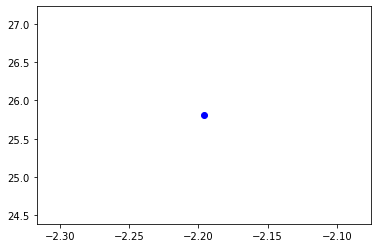

In [78]:
plt.plot(-2.19592, 25.8096, 'bo')
plt.show()